# BDDA Group 7
Swapnil Malik 015016
Sumit Gupta 015022
Muskan Jain 015034
Pragya Jain 015038
Sarthak Kumar 015042

In [ ]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
#import os,time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1.11 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 2.0 Mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Restaurant/train.csv.zip")

In [6]:
df.shape

(137, 43)

In [7]:
df.head(2)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [9]:
#Checking if there are Missing/duplicate values
df.isnull().sum()           
df.isnull().sum().sum()     
df.duplicated().sum()       

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

0

0

In [10]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [11]:
df.drop('Id',axis=1,inplace=True)

In [12]:
df['Open Date'] = pd.to_datetime(df['Open Date'])
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


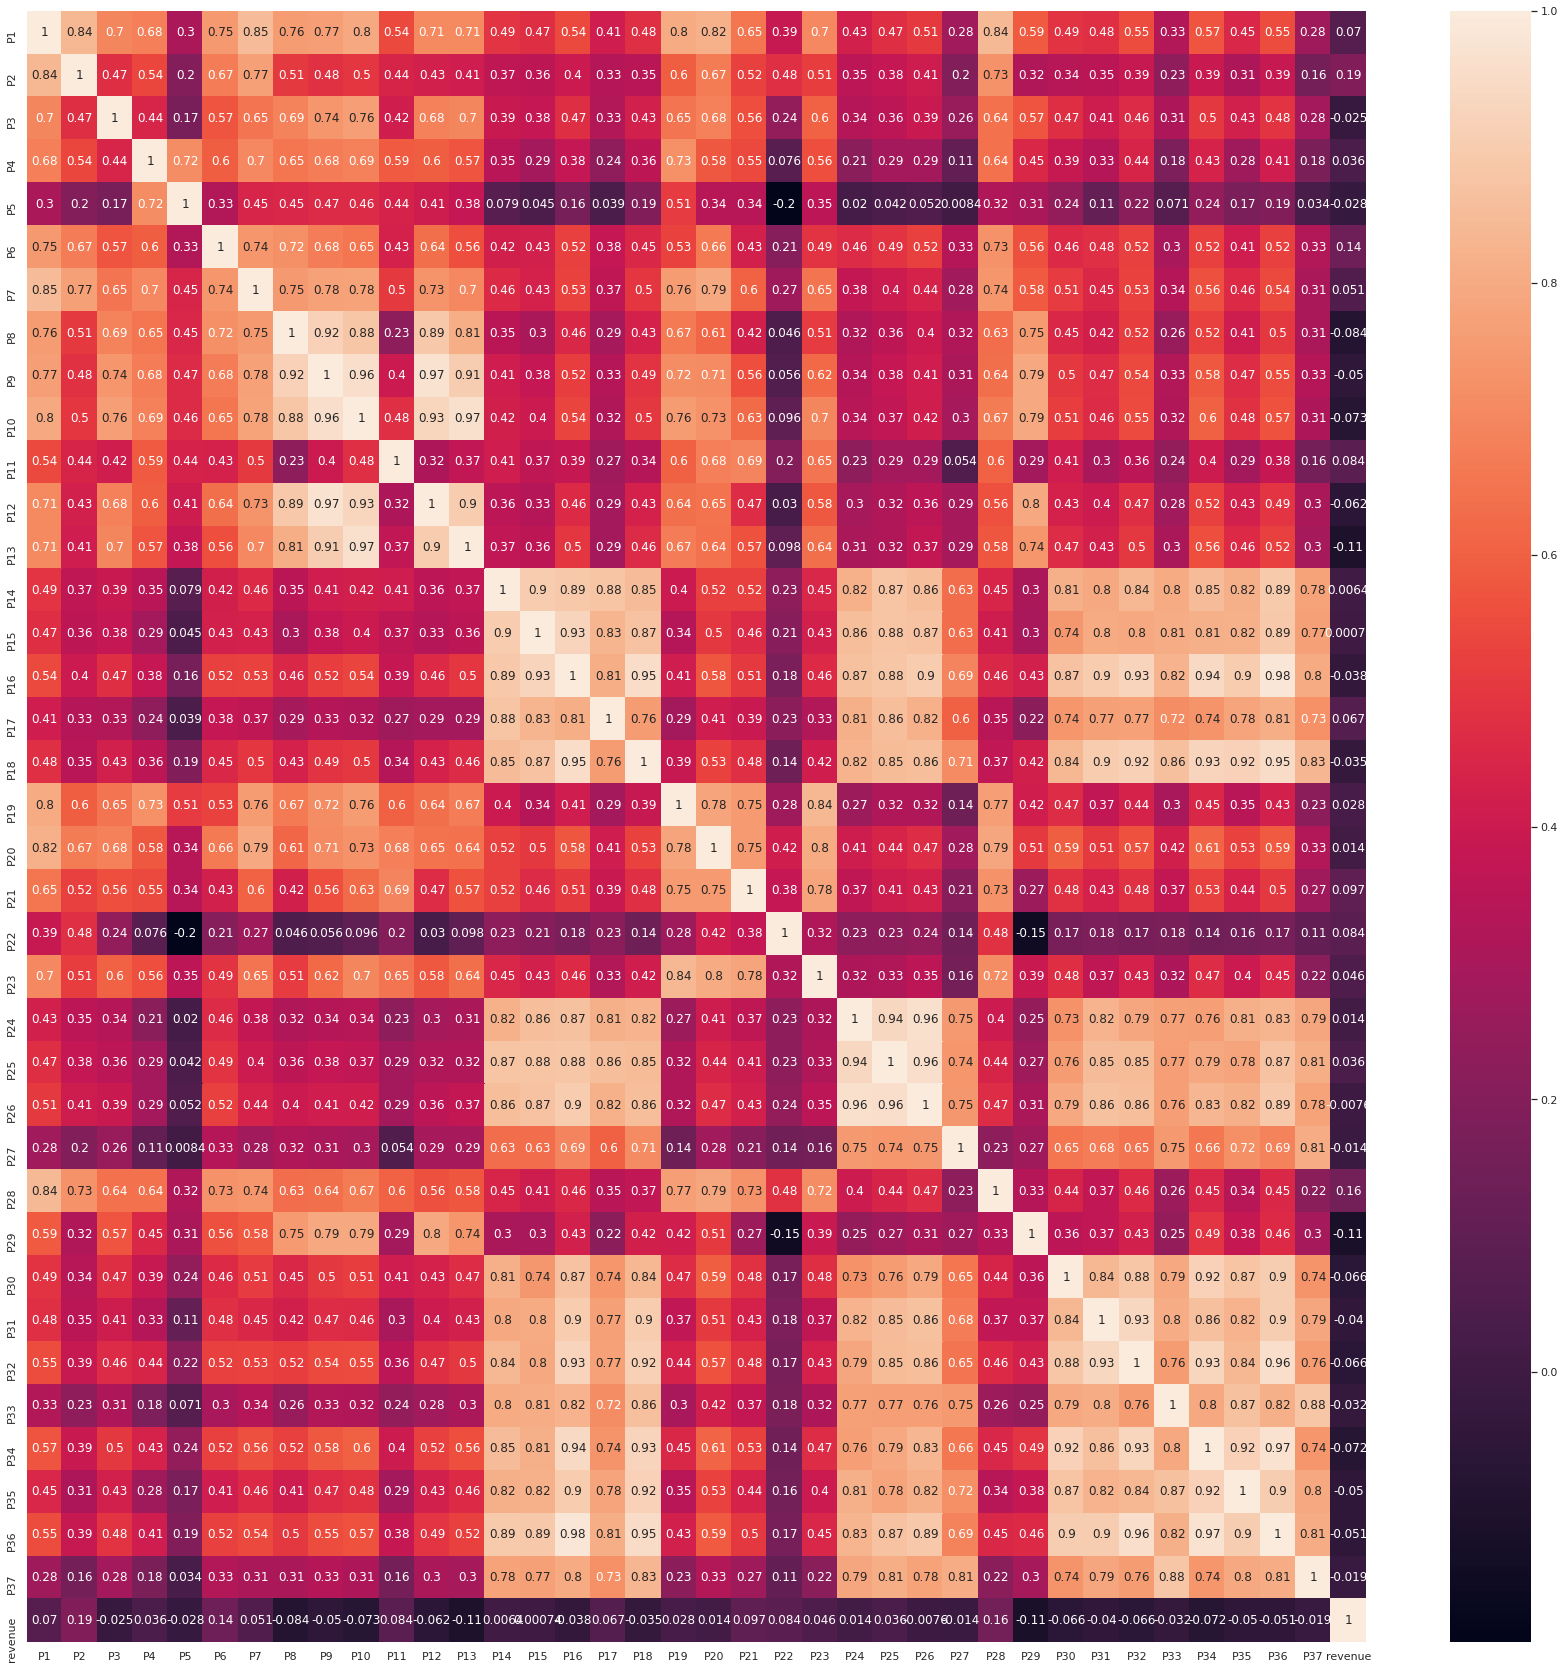

In [13]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(30,30)) 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True, ax=ax)

By Observing the Heat Map we can say that some P values have significant correlation with revenue as compared to others

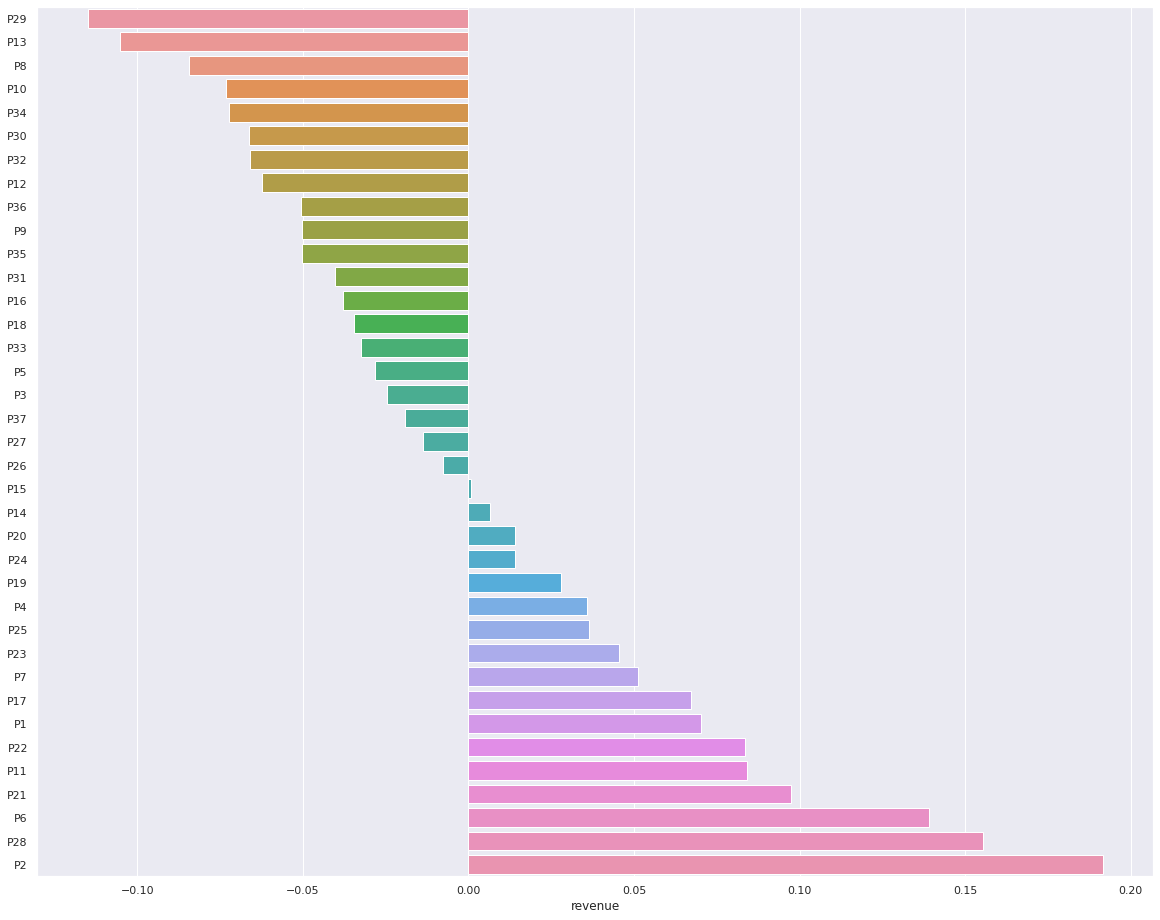

In [14]:
# Creating a plot for the correlation of features to the target variable
fig = plt.figure(figsize=(20,16))
target_corr = df[df.columns[1:]].corr()['revenue']
order_corr = target_corr.sort_values()
y = pd.DataFrame(order_corr).index[:-1]
x = pd.DataFrame(order_corr).revenue[:-1]
sns.barplot(x, y, orient='h')
plt.show()

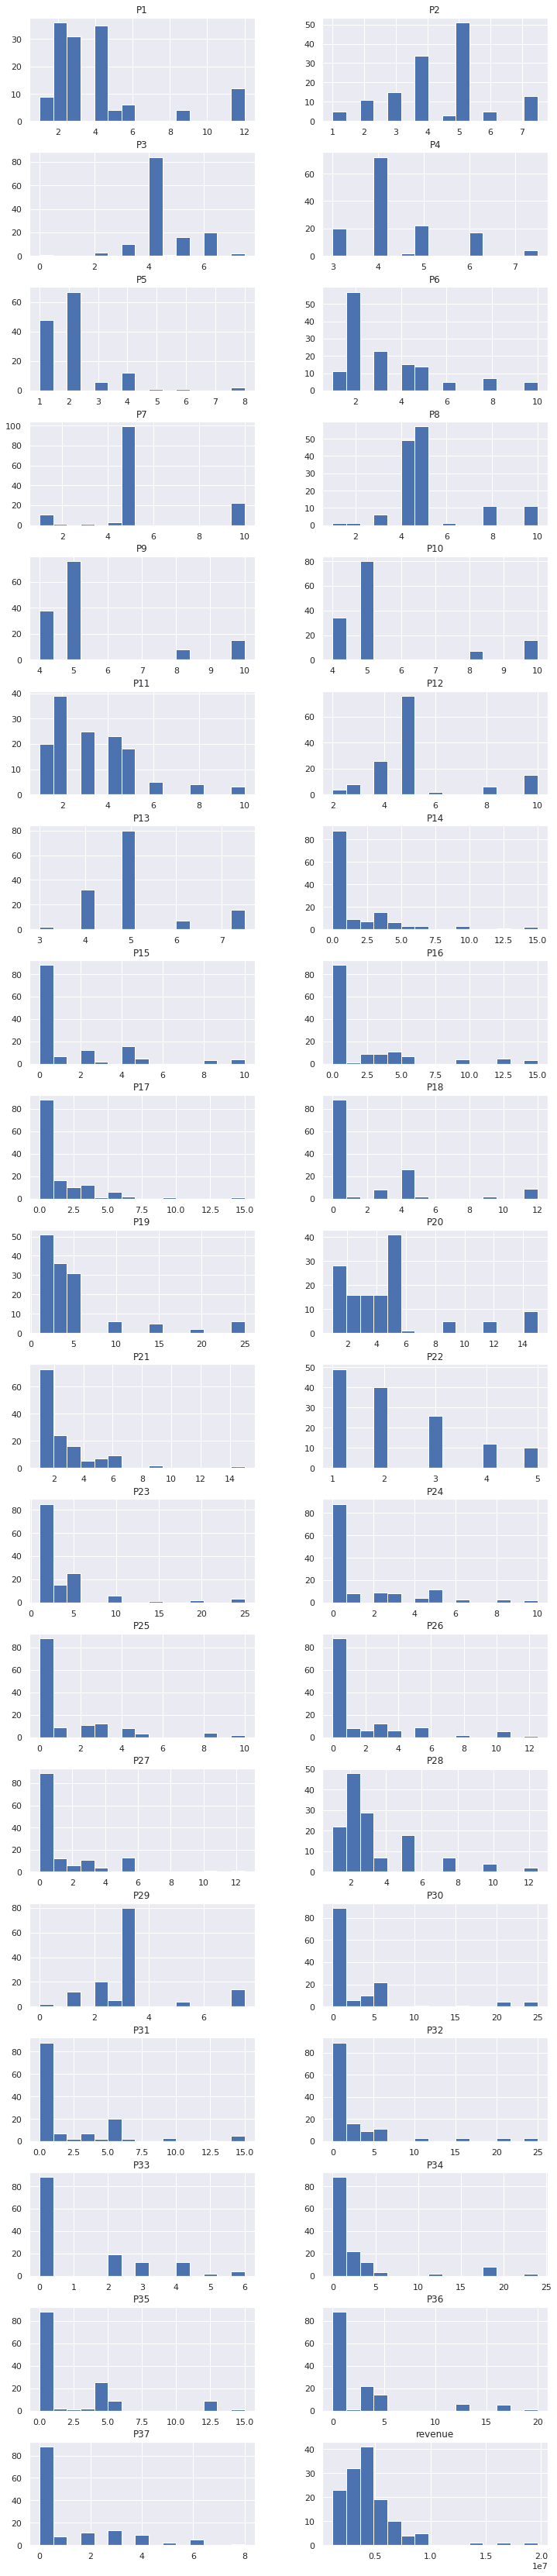

In [15]:
#Plot histograms for all the P columns and the revenue column
hist_cols = list(df.columns[4:42])
df[hist_cols].hist(figsize= (12,60), layout=(19,2), bins=15);

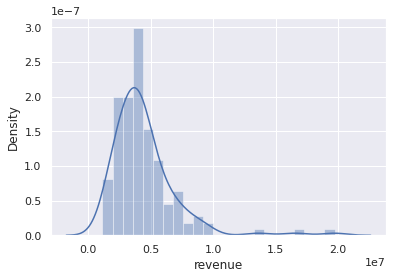

In [16]:
sns.distplot(df['revenue'])

We can observe that the revenue independent variable is rightly skewed and we have outliers when revenue is greater than 10000000

In [17]:
df[df['revenue'] > 10000000 ]

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,2000-01-07,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,5,4,5,4,3,5,4.0,0,0,0,0,0,1,4,1,1,1,0,0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,19696939.0
75,2005-10-15,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,4,5,3,4,4,5,3,4.0,0,0,0,0,0,5,5,5,5,4,0,0,0.0,0.0,5.0,0.0,0,0,0,0,0,0,0,0,16549064.0
99,1999-12-18,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,4,5,4,4,4,5,3,4.0,5,5,5,5,5,5,5,5,3,1,5,5,5.0,1.0,5.0,1.0,5,5,4,2,5,5,5,3,13575224.0


In [18]:
# Drop outliers
df = df[df['revenue'] < 10000000 ]
df.reset_index(drop=True).head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [19]:
# Here we are extracting the month from the feature 'Open Date'
df['month']=[x.month for x in df['Open Date']]

In [20]:
# Here we are extracting the year from the feature 'Open Date'
df['year']=[x.year for x in df['Open Date']]

In [21]:
df=df.drop(['Open Date'],axis=1)
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# exluding revenue from VIF calculation because it's variable to be predicted
features=df.loc[:,"P1":"P37"]
vif_data = pd.DataFrame()
vif_data["features"] = features.columns
vif_data["vif"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]
vif_data = vif_data.sort_values(by=["vif"])
vif_data

,features,vif
26,P27,6.249662
21,P22,10.327131
22,P23,12.130278
20,P21,13.334319
16,P17,14.064693
36,P37,15.457644
4,P5,16.935098
32,P33,17.637757
5,P6,18.704521
10,P11,21.653556


There exits high multicollinearity in our data.

In [23]:
df.drop(["P4","P8","P9","P10","P12","P13","P16","P36"],axis=1,inplace=True)

In [24]:
# to check which city has maximum number of restaurants
df["City"].value_counts()

İstanbul          47
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Tekirdağ           3
Kayseri            3
Diyarbakır         3
Adana              3
Eskişehir          3
Konya              2
Trabzon            2
Aydın              2
Muğla              2
Edirne             1
Osmaniye           1
Bolu               1
Denizli            1
Isparta            1
Karabük            1
Kütahya            1
Balıkesir          1
Kırklareli         1
Gaziantep          1
Tokat              1
Uşak               1
Kastamonu          1
Şanlıurfa          1
Kocaeli            1
Elazığ             1
Amasya             1
Afyonkarahisar     1
Name: City, dtype: int64

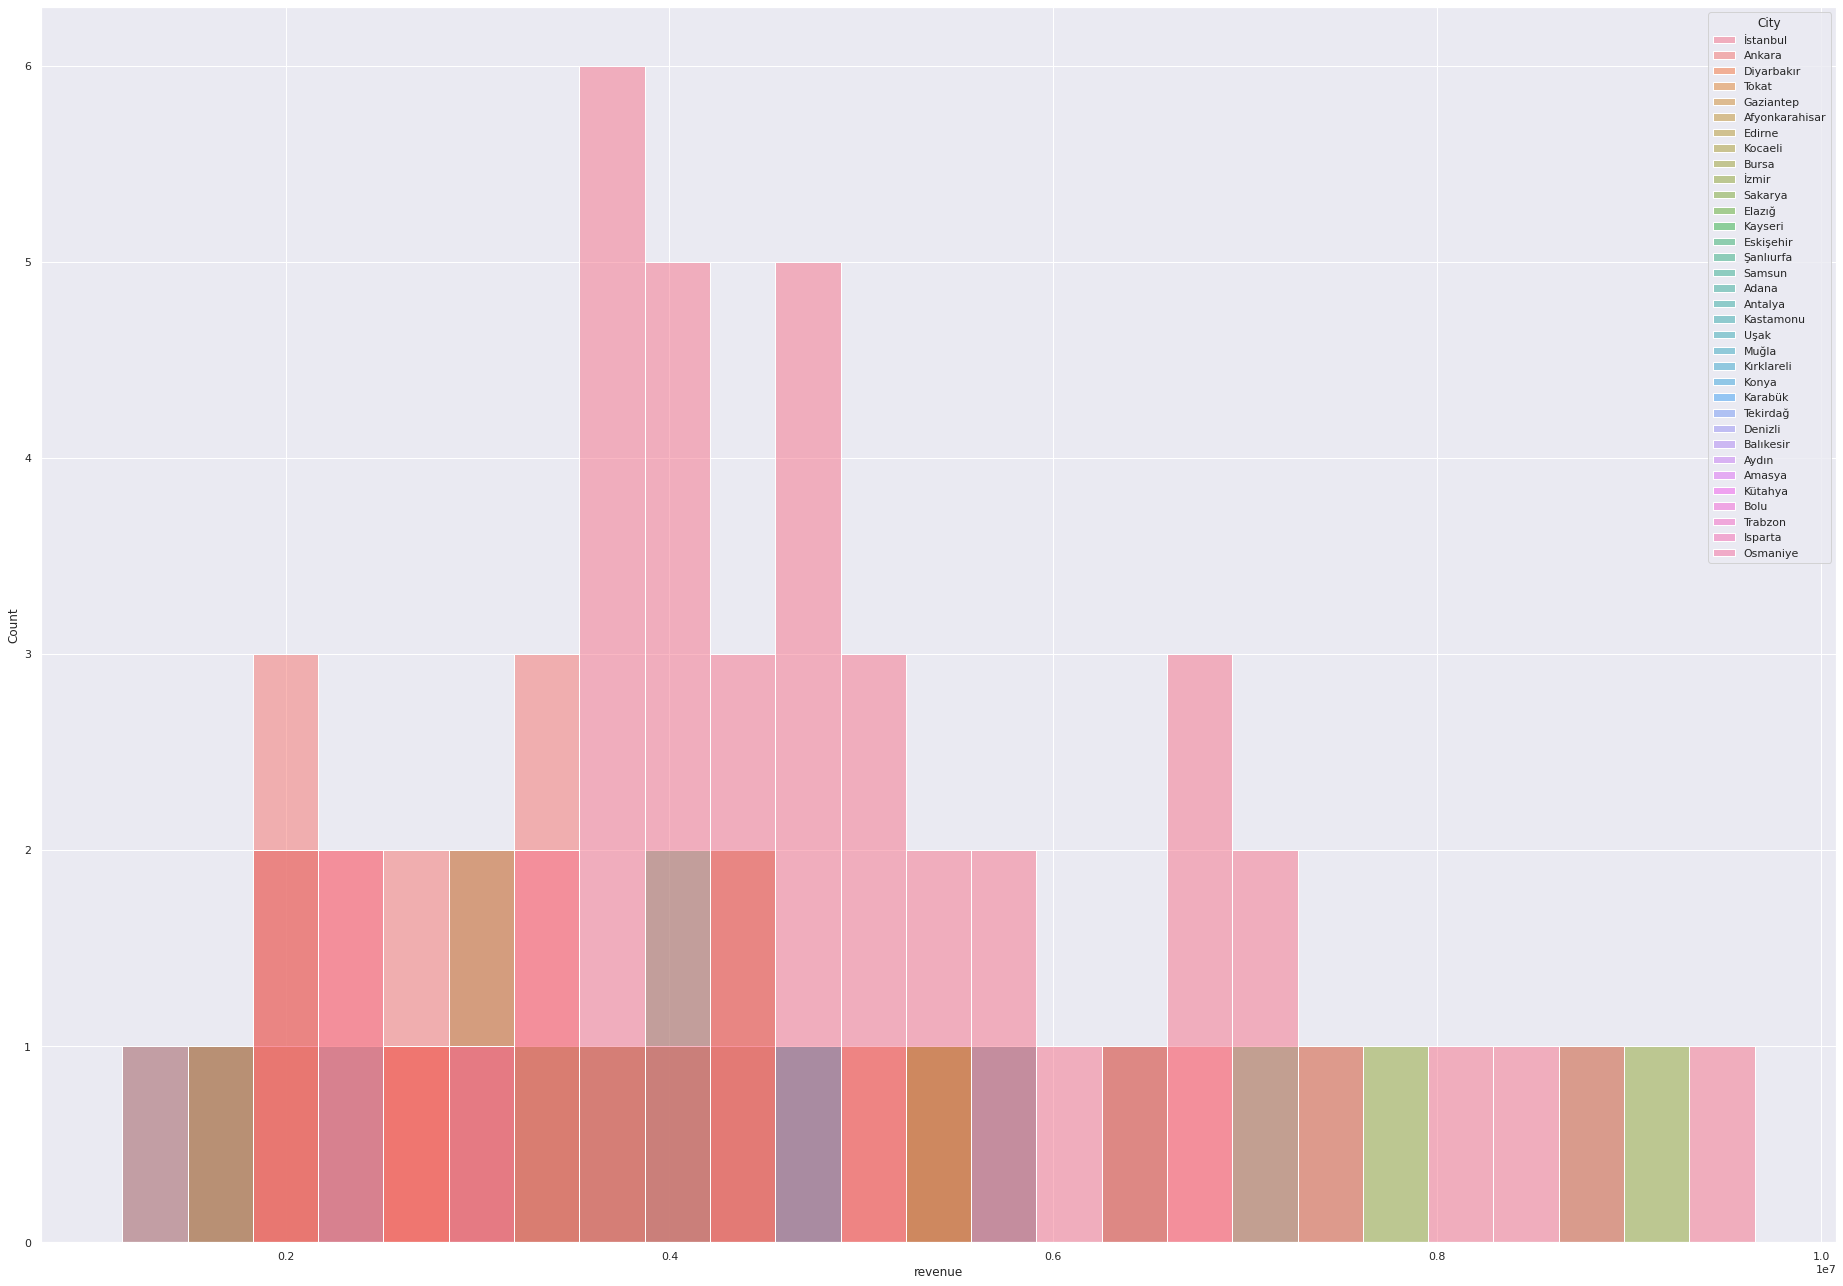

In [25]:
# Distribution of target variable (revenue) by City
fig = plt.figure(figsize=(30,100))
gs1 = gridspec.GridSpec(3,3)
gs1.update(left=1.15, right=2.48, hspace=0.7, wspace=0.5)
ax1 = plt.subplot(gs1[-1, :-1])

sns.histplot(data=df, x='revenue', bins=25,hue='City', ax=ax1)

plt.show()

Istanbul is the only city that has maximum number of restaurants. Most of the other restaurants have significantly less number of restaurants. Cannot do one hot encoding for each and every city, it will make so many features and make it more difficult and complex.

In [26]:
print("City Group Categoies:",df['City Group'].unique())

City Group Categoies: ['Big Cities' 'Other']


Text(0.5, 1.0, 'City Group Counts')

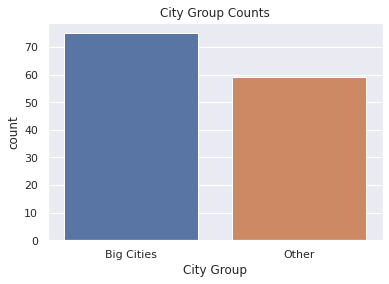

In [27]:
sns.countplot('City Group', data=df)
plt.title('City Group Counts')
plt.show()

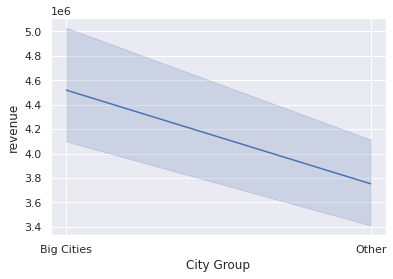

In [28]:
sns.lineplot(x='City Group',y='revenue',data=df)

The Cities With Type as Big Cities have higher revenues and the rest are named as others

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Train Set')

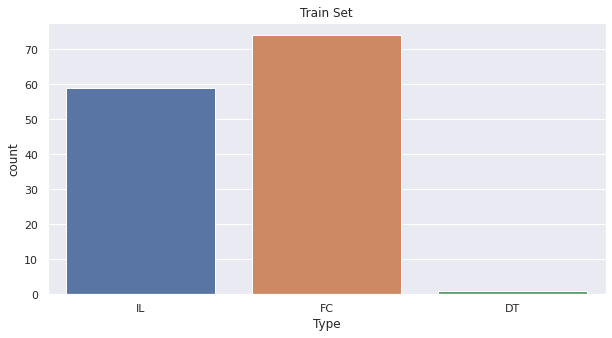

In [29]:
plt.figure(figsize=(10,5))

sns.countplot(x='Type',data=df)
plt.title('Train Set')
plt.show()

<BarContainer object of 3 artists>

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Revenue')

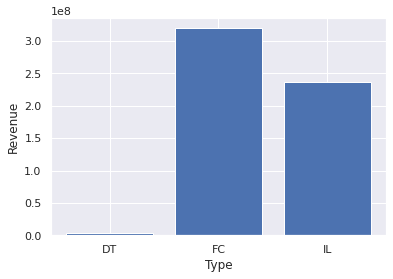

In [30]:
# lets check how Type affects our revenue feature
type_revenue_group = df["revenue"].groupby(df["Type"])
agg_data = type_revenue_group.sum()
x_axis = agg_data.index
y_axis = agg_data
plt.bar(x_axis,y_axis)
plt.xlabel("Type")
plt.ylabel("Revenue")
plt.show()

FC Type is generating maximum revenue. IL closly competing with FC type.
DT is almost generating insignificant amount of revenue.

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Opening Month')

Text(0, 0.5, 'Openings')

Text(0.5, 1.0, 'No of openings per month')

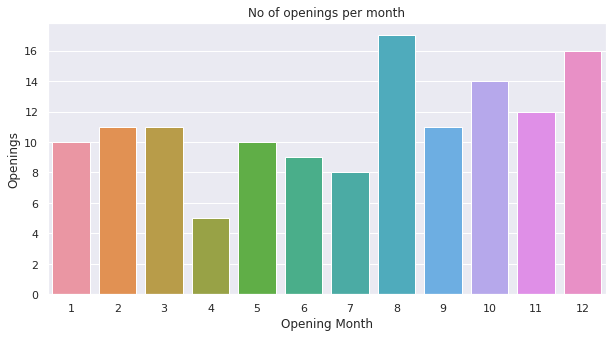

In [31]:
plt.figure(figsize=(10,5))

sns.countplot(x='month',data=df)
plt.xlabel('Opening Month')
plt.ylabel('Openings')
plt.title('No of openings per month')
plt.show()

We have the most data for the last 5 months as this shows occurence of these months in the datatset. The highest of them is from August and December and so restaurants have opened most in these 2 months.

To analyse in which month did we have the most revenue we have to calculate the mean of the revenue for each month.

In [32]:
df.groupby('month')['revenue'].mean()

month
1     4.521243e+06
2     4.189109e+06
3     3.969557e+06
4     4.726097e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     5.390856e+06
10    4.428821e+06
11    4.721400e+06
12    3.720047e+06
Name: revenue, dtype: float64

September gave the most revenue to the restraunts folllowed by April, November, January and October respectively.

<Figure size 936x360 with 0 Axes>

Text(0.5, 1.0, 'Revenue Vs Month')

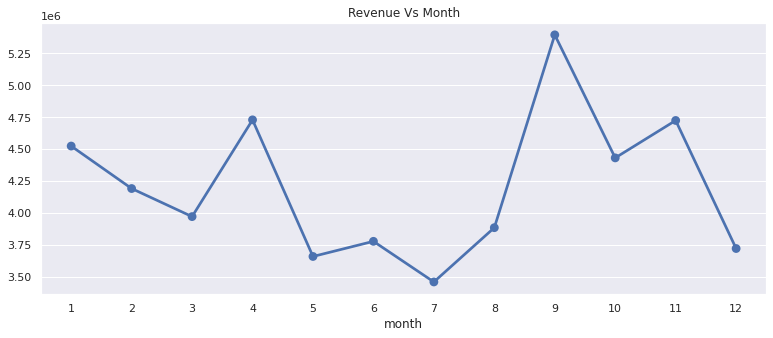

In [33]:
plt.figure(figsize=(13,5))
months_revenue_mean=df.groupby('month')['revenue'].mean()
sns.pointplot(x=months_revenue_mean.index,y=months_revenue_mean.values)
plt.title('Revenue Vs Month')
plt.show()

The Revenues are highest for the September month while for the months of May, June and July the restaurants have the lowest revenues.
This is a graphical representation of the mean of revenue of each month which helps in visualization.

<Figure size 936x360 with 0 Axes>

Text(0, 0.5, 'Number of Openings')

Text(0.5, 1.0, 'Number Of Openings Per Year')

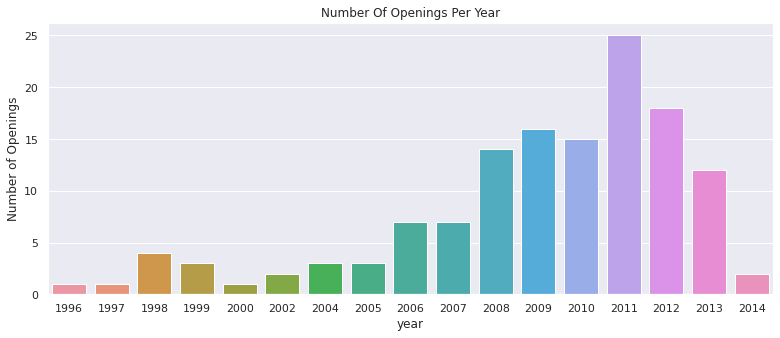

In [34]:
plt.figure(figsize=(13,5))
sns.countplot(x='year',data=df)
plt.ylabel('Number of Openings')
plt.title('Number Of Openings Per Year')
plt.show()

The highest of them is from 2011 followed by 2012, 2009 and 2010 so restaurants have opened most in these 2 months.

In [35]:
df.groupby('year')['revenue'].mean()

year
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2002    4.991022e+06
2004    3.482435e+06
2005    3.298470e+06
2006    4.203972e+06
2007    5.079333e+06
2008    4.876962e+06
2009    4.652457e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.837859e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

2000 gave the most revenue to the restraunts folllowed by 1999 and 2007 respectively.

<Figure size 1008x360 with 0 Axes>

Text(0.5, 0, 'Revenue')

Text(0, 0.5, 'Year')

Text(0.5, 1.0, 'Revenue Per Year')

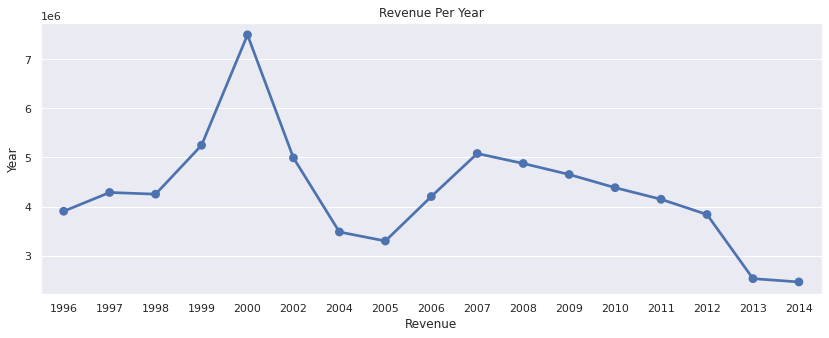

In [36]:
plt.figure(figsize=(14,5))
year_revenue_means=df.groupby('year')['revenue'].mean()
sns.pointplot(year_revenue_means.index,year_revenue_means.values)
plt.xlabel('Revenue')
plt.ylabel('Year')
plt.title('Revenue Per Year')
plt.show()

 

1.   The Year 1999 and 2000 witnesed the highest revenues while there is a constant decrease in revenue from year 2007.
2.   The year 2013 and 14 had the lowest revenues which might be due to lesser number of samples.

Maximum Number of Restaurants Openend in the year 2011

Median Revenue of Big cities: 4136425.0
Median Revenue of Other cities: 3745135.0


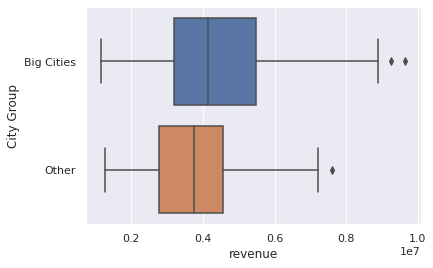

In [37]:
# Median Revenue of big cities and other cities
ax_wp_1 = sns.boxplot(x='revenue', y='City Group', data=df)

bc_median = df[df['City Group'] == 'Big Cities']['revenue'].median()
oc_median = df[df['City Group'] == 'Other']['revenue'].median()
print("Median Revenue of Big cities:", bc_median)
print("Median Revenue of Other cities:", oc_median)

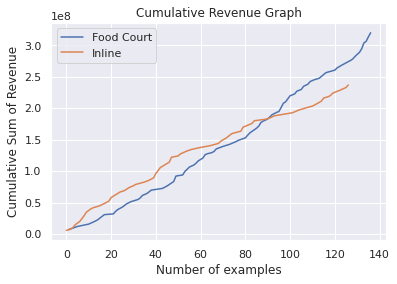

In [38]:
df[df['Type'] == 'FC']['revenue'].cumsum().plot()
df[df['Type'] == 'IL']['revenue'].cumsum().plot()
plt.ylabel('Cumulative Sum of Revenue')
plt.xlabel('Number of examples')
plt.legend(['Food Court', 'Inline'])
plt.title('Cumulative Revenue Graph');

In [39]:
df

,City,City Group,Type,P1,P2,P3,P5,P6,P7,P11,P14,P15,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P37,revenue,month,year
0,İstanbul,Big Cities,IL,4,5.0,4.0,2,2,5,3,1,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,4,5653753.0,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,1,2,5,1,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,2,3,5,2,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,IL,6,4.5,6.0,4,4,10,8,6,4,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,6,2675511.0,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,2,2,5,2,2,1,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,4,2,4,4,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,Big Cities,FC,4,5.0,4.0,2,3,5,5,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,Other,FC,3,4.0,4.0,2,3,5,1,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,FC,4,5.0,4.0,2,2,5,2,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,7217634.0,10,2010


In [40]:
types={'FC':0,'IL':1,'DT':2}
df['Type'] = df['Type'].map(types)
df

,City,City Group,Type,P1,P2,P3,P5,P6,P7,P11,P14,P15,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P37,revenue,month,year
0,İstanbul,Big Cities,1,4,5.0,4.0,2,2,5,3,1,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,4,5653753.0,7,1999
1,Ankara,Big Cities,0,4,5.0,4.0,1,2,5,1,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,1,2,4.0,2.0,2,3,5,2,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,1,6,4.5,6.0,4,4,10,8,6,4,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,6,2675511.0,2,2012
4,Gaziantep,Other,1,3,4.0,3.0,2,2,5,2,2,1,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,0,2,3.0,3.0,4,2,4,4,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,Big Cities,0,4,5.0,4.0,2,3,5,5,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,Other,0,3,4.0,4.0,2,3,5,1,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,0,4,5.0,4.0,2,2,5,2,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,7217634.0,10,2010


In [41]:
cities={'Big Cities':0,'Other':1}
df['City Group'] = df['City Group'].map(cities)
df

,City,City Group,Type,P1,P2,P3,P5,P6,P7,P11,P14,P15,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P37,revenue,month,year
0,İstanbul,0,1,4,5.0,4.0,2,2,5,3,1,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,4,5653753.0,7,1999
1,Ankara,0,0,4,5.0,4.0,1,2,5,1,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,1,1,2,4.0,2.0,2,3,5,2,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,1,1,6,4.5,6.0,4,4,10,8,6,4,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,6,2675511.0,2,2012
4,Gaziantep,1,1,3,4.0,3.0,2,2,5,2,2,1,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,1,0,2,3.0,3.0,4,2,4,4,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,0,0,4,5.0,4.0,2,3,5,5,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,1,0,3,4.0,4.0,2,3,5,1,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,0,0,4,5.0,4.0,2,2,5,2,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,7217634.0,10,2010


In [42]:
l=df['City'].value_counts()

In [43]:
m=l.index

In [44]:
n={}
for i,j in enumerate(m):
  n.update({j:i})
  print(n)

{'İstanbul': 0}
{'İstanbul': 0, 'Ankara': 1}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'Tekirdağ': 7}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'Tekirdağ': 7, 'Kayseri': 8}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'Tekirdağ': 7, 'Kayseri': 8, 'Diyarbakır': 9}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'Tekirdağ': 7, 'Kayseri': 8, 'Diyarbakır': 9, 'Adana': 10}
{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Sakarya': 5, 'Antalya': 6, 'T

In [45]:
df['City'] = df['City'].map(n)
df

,City,City Group,Type,P1,P2,P3,P5,P6,P7,P11,P14,P15,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P37,revenue,month,year
0,0,0,1,4,5.0,4.0,2,2,5,3,1,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,4,5653753.0,7,1999
1,1,0,0,4,5.0,4.0,1,2,5,1,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,6923131.0,2,2008
2,9,1,1,2,4.0,2.0,2,3,5,2,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,2055379.0,3,2013
3,26,1,1,6,4.5,6.0,4,4,10,8,6,4,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,6,2675511.0,2,2012
4,25,1,1,3,4.0,3.0,2,2,5,2,2,1,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,13,1,0,2,3.0,3.0,4,2,4,4,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,5787594.0,6,2008
133,2,0,0,4,5.0,4.0,2,3,5,5,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,9262754.0,10,2006
134,8,1,0,3,4.0,4.0,2,3,5,1,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,2544857.0,7,2006
135,0,0,0,4,5.0,4.0,2,2,5,2,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,7217634.0,10,2010


In [46]:
x=df.drop('revenue',axis=1)
y=df['revenue']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(93, 34)
(93,)
(41, 34)
(41,)


In [48]:
#Extract list of cat_cols and num_cols:
dg = (df.nunique() < 5)  

#Then filter out names from Series index 
cat_cols = dg[dg==True].index.tolist()
num_cols = dg[dg==False].index.tolist()

In [49]:
cat_cols
num_cols

['City Group', 'Type']

['City',
 'P1',
 'P2',
 'P3',
 'P5',
 'P6',
 'P7',
 'P11',
 'P14',
 'P15',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P37',
 'revenue',
 'month',
 'year']

In [50]:
ohe = OneHotEncoder(sparse = False)
ohe.fit_transform(df[cat_cols])

array([[1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1.

In [51]:
ss = StandardScaler()
ss.fit_transform(df[num_cols])

array([[-0.70352027, -0.00509488,  0.39675862, ...,  0.82120632,
        -0.01263172, -2.53540884],
       [-0.58568063, -0.00509488,  0.39675862, ...,  1.52922158,
        -1.42317366, -0.21721092],
       [ 0.35703654, -0.68780936, -0.25960749, ..., -1.18584258,
        -1.14106528,  1.07067682],
       ...,
       [ 0.23919689, -0.34645212, -0.25960749, ..., -0.91282863,
        -0.01263172, -0.73236601],
       [-0.70352027, -0.00509488,  0.39675862, ...,  1.69348519,
         0.83369345,  0.29794418],
       [-0.70352027, -0.00509488,  0.39675862, ...,  1.21693425,
         0.55158506,  0.04036663]])

In [52]:
#So complete dataset is:
a = ohe.transform(df[cat_cols])
b = ss.transform(df[num_cols])

#Horizontally concatenate now
Xtr = np.hstack([a,b]) # It is not X_train
Xtr.shape 

(134, 38)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [54]:
#Logistic Regression Pipeline
LinearRegressionPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('linear_classifier',LinearRegression())])

In [55]:
#Decision tree Pipeline
DecisionTreePipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('decisiontree_classifier',DecisionTreeClassifier())])

In [56]:
#Random Forest Pipeline
RandomForestPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_classifier',RandomForestClassifier())])

In [57]:
# Defining the pipelines in a list
mypipeline = [LinearRegressionPipeline, DecisionTreePipeline, RandomForestPipeline]

In [58]:
#Defining variables for choosing best model
accuracy=0.0
classifier=0
pipeline=""

In [59]:
# Creating dictionary of pipelines and training models
PipelineDict = {0: 'Linear Regression', 1: 'Decision Tree', 2: 'Random Forest'}

# Fit the pipelines
for mypipe in mypipeline:
    mypipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('myscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('mypca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linear_classifier',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Pipeline(memory=None,
         steps=[('myscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('mypca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('decisiontree_classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
   

Pipeline(memory=None,
         steps=[('myscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('mypca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforest_classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=Non

In [60]:
#getting test accuracy for all classifiers
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))

Linear Regression Test Accuracy: -0.1703176417574941
Decision Tree Test Accuracy: 0.0
Random Forest Test Accuracy: 0.0


In [61]:
#Choosing best model for the given data
for i,model in enumerate(mypipeline):
    if model.score(X_test,y_test)>accuracy:
        accuracy=model.score(X_test,y_test)
        pipeline=model
        classifier=i
print('Classifier with best accuracy:{}'.format(PipelineDict[classifier]))

Classifier with best accuracy:Linear Regression


In [62]:
knn=KNeighborsRegressor()
knn=knn.fit(X_train,y_train)

In [63]:
pred = knn.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the KNN regressor is: "+str(s))
print("The MSE with the KNN regressor is: "+str(s1))
print("The R2_Score with the KNN regressor is: "+str(s2))

The MAE with the KNN regressor is: 1693960.9951219514
The MSE with the KNN regressor is: 3719641058066.958
The R2_Score with the KNN regressor is: -0.5872348206630302


In [64]:
dtr = DecisionTreeRegressor() #create the object of the model
dtr=dtr.fit(X_train,y_train)

In [65]:
pred = dtr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the DT regressor is: "+str(s))
print("The MsE with the DT regressor is: "+str(s1))
print("The R2_Score with the DT regressor is: "+str(s2))

The MAE with the DT regressor is: 1662167.6341463414
The MsE with the DT regressor is: 4718135563353.0
The R2_Score with the DT regressor is: -1.013309601075937


In [66]:
r = RandomForestRegressor() #create the object of the model
r=r.fit(X_train,y_train)

In [67]:
pred = r.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the RF regressor is: "+str(s))
print("The MsE with the RF regressor is: "+str(s1))
print("The R2_Score with the RF regressor is: "+str(s2))

The MAE with the RF regressor is: 1205453.3482926833
The MsE with the RF regressor is: 2034718537598.8735
The R2_Score with the RF regressor is: 0.1317506010099121


In [68]:
svr=SVR() #create the object of the model
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [69]:
pred = svr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the RF regressor is: "+str(s))
print("The MsE with the RF regressor is: "+str(s1))
print("The R2_Score with the RF regressor is: "+str(s2))

The MAE with the RF regressor is: 1193366.1951024504
The MsE with the RF regressor is: 2443045012614.2354
The R2_Score with the RF regressor is: -0.0424893294633224


In [70]:
xgb=XGBRegressor()
xgb=xgb.fit(X_train,y_train)

[17:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [71]:
pred = xgb.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the XGB regressor is: "+str(s))
print("The MsE with the XGB regressor is: "+str(s1))
print("The R2_Score with the XGB regressor is: "+str(s2))

The MAE with the XGB regressor is: 1198198.088414634
The MsE with the XGB regressor is: 2209050593761.1895
The R2_Score with the XGB regressor is: 0.05736011397662544


From all the models, KNeighborsregressor gave the minimum error, So thats the best model and should be chosen as the final model.

In [72]:
df_test=pd.read_csv("/content/drive/MyDrive/Restaurant/test.csv.zip")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [73]:
df_test.shape

(100000, 42)

In [74]:
df_test.fillna(0)
df_test['Open Date'] = pd.to_datetime(df_test['Open Date'])
df_test['month']=[x.month for x in df_test['Open Date']]
df_test['year']=[x.year for x in df_test['Open Date']]
df_test=df_test.drop(['Open Date'],axis=1)

types1={'FC':0,'IL':1,'DT':2, 'MB':3}
df_test['Type'] = df_test['Type'].map(types1)
df_test['City Group'] = df_test['City Group'].map(cities)


l=df_test['City'].value_counts()
m = l.index
n={}
for i,j in enumerate(m):
  n.update({j:i})
df_test['City'] = df_test['City'].map(n)

df_test

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
99996,99996,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0
99997,99997,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2
99998,99998,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0


,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,month,year
0,0,46,1,0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,2011
1,1,12,1,1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,3,2011
2,2,1,0,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,10,2013
3,3,4,1,1,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,5,2013
4,4,35,1,0,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,7,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,3,1,0,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,1,2000
99996,99996,46,1,1,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,7,2011
99997,99997,0,0,1,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,12,2012
99998,99998,0,0,0,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,10,2013


In [75]:
#df_test.drop('Id',axis=1, inplace=True)
#df_test.info()

In [76]:
submission = pd.DataFrame(columns=["Id", "Prediction"])
submission["Id"] = df_test['Id']